# Average Reward Linear SARSA

This is the implementation of Average Reward Linear SARSA. Instead of applying discount on rewards, we optimize another parameter which is the average rate of rewards. Note that this reward rate is calculated as taking the limit to infinity so this is for continuing tasks. I applied it on CartPole but it is wrong.

In [1]:
import autograd.numpy as np
import gym
import matplotlib.pyplot as plt
from autograd import grad, elementwise_grad
import random
from IPython import display

In [76]:
# Linear approximation function to expected returns
def approx(weights, state, action):
    return np.dot(state, weights)[action]

def policy(env, weights, state, epsilon):
    actions = [0, 1]
    if np.random.rand() < epsilon:
        return random.choice(actions)
    qs = []
    for action in actions:
        qs.append(approx(weights, state, action))
    return np.argmax(qs)

dapprox = grad(approx)
episodes = 1000
beta = 0.01
epsilon = 0.1
alpha = 0.2
avg_reward = 0.0

In [77]:
env = gym.make('CartPole-v0')
episode_rewards = []
w = np.zeros((4,2))
for e in range(episodes):
    state = env.reset()
    rewards = []
    while True:
        action = policy(env, w, state, epsilon)
        q_hat = approx(w, state, action)
        q_hat_grad = dapprox(w, state, action)
        next_state, reward, done, _ = env.step(action)
        rewards.append(reward)
        if done:
            break
        next_action = policy(env, w, next_state, epsilon)
        q_hat_next = approx(w, next_state, next_action)
        del_t = reward - avg_reward + q_hat_next - q_hat
        avg_reward += beta * del_t
        w += alpha*del_t*q_hat_grad
        state = next_state
    episode_rewards.append(np.sum(rewards))

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [78]:
for i, r in enumerate(episode_rewards):
    if i + 100 >= len(episode_rewards):
        break
    else:
        mean = np.mean(episode_rewards[i:i+100])
        if mean >= 195:
            print("Episodes before solve", i+1)
            break

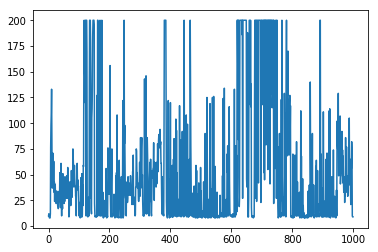

In [79]:
plt.plot(episode_rewards)

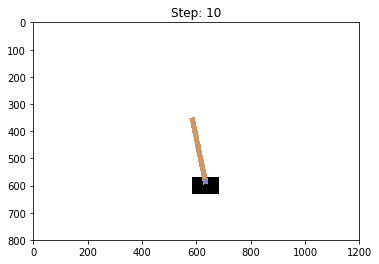

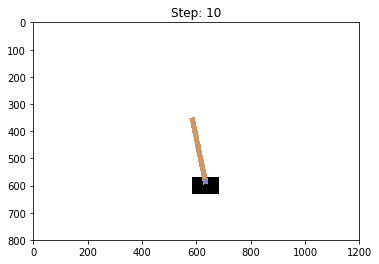

In [80]:
def show_state(env, step=0):
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    plt.title("Step: %d" % (step))
    
    plt.pause(0.001)  # pause for plots to update
    
    display.clear_output(wait=True)
    display.display(plt.gcf())
        
done = False
state = env.reset()
step = 0
while not done:
    step += 1
    show_state(env, step)
    action = policy(env, w, state, 0.0)
    state, _, done, _ = env.step(action)